# Assignment 3: Classification with Logistic Regression  [ __ /130  marks]

<hr>
<!-- <img src=https://www.tibco.com/sites/tibco/files/media_entity/2020-09/logistic-regression-diagram.svg width=600> -->
<img src=https://miro.medium.com/max/1838/1*wWRGcsBwoXw-WNJi5UpoOw.png width=600>
<hr>

In this assignment we will consider the `diabetes` dataset from kaggle: https://www.kaggle.com/kandij/diabetes-dataset

We will use logistic regression to classify subjects based on the input features; we will also evaluate our model with/without regularization.

## Before you start...
* check out the relevant lecture code (L3_codeF.ipynb) for reference

## Before you submit...
* restart the kernel, then re-run the whole notebook to ensure no errors

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1.1 [ _ /4 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /10 marks]

Please answer the following short-answer questions `(a-d)`. Your answer can be brief (a few words or a sentence).

**(a) How many input features does this dataset have?**  

Your answer:There are "8" input features in the dataset which are as follows:
1.Pregnancies
2.Glucose
3.BloodPressure
4.SkinThickness
5.Insulin
6.BMI
7.DiabetesPedigreeFunction
8.Age


**(b) What is the dependent variable?** 

Your answer: The dependent variable here is "Outcome".

**(c) How many classes are there?**

Your answer:There are only "2" classes which are "0" and "1".

**(d) Is the dataset class-balanced? Check with some code.**

In [3]:
# ****** your code here ******
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


Your answer: The dataset is not balanced since it has different numbers of 0's and 1's

## Question 1.3 [ _ /12 marks]

Split the data into train and test sets: Use `train_test_split` with `random_state=0`. Use 50% of the data for training and 50% for testing.

In [4]:
# Store the input values into a variable called "X" [ /4 marks]
# ****** your code here ******
X=df.iloc[:,0:8].values
y=df.Outcome.values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)


# Convert 0's and 1's to "Neg" and "Pos" class labels. Store the output class values into variable "y" [ /6 marks]
# ****** your code here ******
y=df.Outcome.replace(to_replace=[0,1], value=['Neg', 'Pos'])


# Split your X and y data using train_test_split [ /2 marks]
# ****** your code here ******
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)

## Question 1.4 [ _ /16 marks]

Consider sklearn's `LogisticRegression` class. Create a `LogisticRegression` object with `penalty=none`. Train and test this classifier using "Insulin" as the independent variable and "Outcome" as the dependent variable. Make a scatter plot of the points. Plot your prediction on the same graph.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


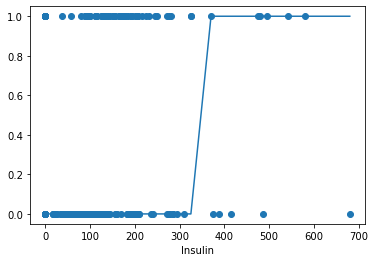

In [12]:
# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
lr=LogisticRegression(penalty="none")
# Create training data and test data for X [ /4 marks]
# ****** your code here ******
X=df.Insulin.values
y=df.Outcome.values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)


# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
lr.fit(X_train.reshape(-1,1),y_train)


# Create a scatter plot of the test data. Also plot your prediction. [ /8 marks]
# ****** your code here ******
plt.scatter(X_test,y_test)
y_pred=lr.predict(X_test.reshape(-1,1))
sns.lineplot(X_test,y_pred)
plt.xlabel("Insulin")


y_test_prob1=lr.predict_proba(X_test.reshape(-1,1))

## Question 1.5 [ _ /12 marks]

How many True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) were there from your classification test results in question 1.4? What was the test accuracy of your classifier? You can use the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [6]:
# Calculate tp, tn, fp, fn, and test accuracy
# ****** your code here ******

def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    acc = (tp + tn) / (tp + tn + fp + fn)
        
    print("Accuracy:",round(acc,3))
    
compute_performance(y_pred,y_test,lr.classes_)




tp: 6 tn: 248 fp: 5 fn: 125
Accuracy: 0.661


## Question 1.6 [ _ /18 marks]

Now try adjusting the decision threshold to 0.35 (instead of the default, which is 0.5). Report TP, TN, FP, FN, and Accuracy.

In [7]:
# Using your fit from question 1.4, adjust the decision threshold and get the updated predictions [ /6 marks]
# ****** your code here ******
y_test_prob=lr.predict_proba(X_test.reshape(-1,1))
y_hat=lr.classes_[(y_test_prob[:,1]>0.35).astype("int")]

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_hat,y_test,lr.classes_)





tp: 58 tn: 174 fp: 79 fn: 73
Accuracy: 0.604


## Question 1.7 [ _ /6 marks]

What happens when the threshold is lowered from question 1.5 to question 1.6? Could one model be more useful than the other? Answer in a few sentences.

Your answer: The number of True positive and False positive cases increased when the threshold was lowered while the True negative and False negative cases decreased when we lowered the threshold.
It affected the accuracy as well.
The accuracy gets lower with lower threshold.

Yes as we have seen with the change in the threshold, the values got changed.
So one model can be proved to be better than the other just by adjusting the threshold correctly.

## Question 1.8 [ _ /18 marks]

Create another `LogisticRegression` object with `penalty=none`. Train and test this classifier, this time using all input features. Calculate TP, FP, TN, FN, and Accuracy.

In [8]:
# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
lr=LogisticRegression(max_iter=150,penalty="none")

X=df.iloc[:,0:8].values
y=df.Outcome.values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)


# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
lr.fit(X_train,y_train)


# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred=lr.predict(X_test)

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,lr.classes_)




y_test_prob2=lr.predict_proba(X_test)

tp: 75 tn: 228 fp: 25 fn: 56
Accuracy: 0.789


## Question 1.9 [ _ /20 marks]

Create a final `LogisticRegression` object with `penalty=l2`, `C=0.01`. Train and test this classifier using all input features. Calculate TP, FP, TN, FN, and Accuracy. Did regularization help in this case? 

In [9]:
# Create a LogisticRegression object with l2 regularization [ /2 marks]
# ****** your code here ******

# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
lr=LogisticRegression(max_iter=200,penalty="l2",C=0.01)

X=df.iloc[:,0:8].values
y=df.Outcome.values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)


# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
lr.fit(X_train,y_train)


# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred=lr.predict(X_test)

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,lr.classes_)



y_test_prob3=lr.predict_proba(X_test)

tp: 74 tn: 228 fp: 25 fn: 57
Accuracy: 0.786


Your answer: There's not much change in the classifier's performance after the regularization. But only few changes in the True positive and false negative. The number of cases for true positive decreased while for false negative, it got increased and the rest of all others cases remains to be same.
There's not much change in the accuracy as well, but with regularization there's a very small decrease in accuracy.

## Question 2.1 [ _ /14 marks]

Plot ROC Curves for the classifiers you used in questions 1.4, 1.8, and 1.9. Use AUC to determine which classifier is the best. State the best classifier.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


With One feature Insulin only
0.5322994297438373
With all features
0.848052379084573
All features with regularization
0.8391817276649669


Text(0, 0.5, 'True Positive Rate')

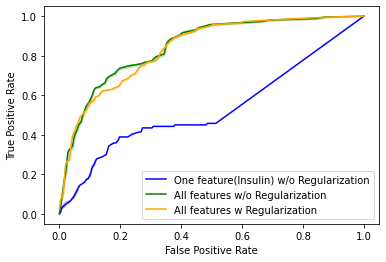

In [11]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers [ /6 marks]
# ****** your code here ******

fpr1,tpr1,_=roc_curve(y_test,y_test_prob1[:,1])


fpr2,tpr2,_=roc_curve(y_test,y_test_prob2[:,1])


fpr3,tpr3,_=roc_curve(y_test,y_test_prob3[:,1])

# Plot all of the ROC curves [ /3 marks]
# ****** your code here ******
sns.lineplot(fpr1,tpr1,color='blue')
sns.lineplot(fpr2,tpr2,color='green')
sns.lineplot(fpr3,tpr3,color='orange')
plt.legend(labels=["One feature(Insulin) w/o Regularization","All features w/o Regularization","All features w Regularization"])

# Determine AUC for each of the ROC curves [ /3 marks]
# ****** your code here ******
print("With One feature Insulin only")
print(auc(fpr1,tpr1))
print("With all features")
print(auc(fpr2,tpr2))
print("All features with regularization")
print(auc(fpr3,tpr3))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Your answer: The AUC of the classifier used in question 1.8 i.e. the one with all the features without Regularization is highest, so it's the best classifier among all the other classifiers.